First try for creating likelihood plots. Some code snipplets are copied from https://github.com/ElisabethRoesch/Bifurcations 

###### [1] Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from numpy import genfromtxt
from matplotlib import ticker, cm
from matplotlib.patches import Rectangle
from numpy import inf
#from numpy import NaN

In [2]:
#LL info
alphas = [5] # corresponds to number of parameter a (start counting from 1)
ics = [6] # corresponds to number of n0
noises = [1] # number of noise
fig = plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

In [3]:
# help functions

def get_ll_alps_one(alp_ind): # converts number of alpha to actual alpha value (alp_ind is number of alpha value)
    #print('alp_ind',alp_ind)
    alp = [-1.5,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.5] # actual alpha values they have data for
    real_value = alp[alp_ind-1]
    #print('real_value',real_value)
    ratio_value = abs((-2)-(real_value))/4
    #print('ratio_value',ratio_value)
    new_value = (ratio_value)*10
    #print('new_value',new_value)
    return new_value

def get_ll_ics_one(ics_ind): # converts number of ic to actual ic value
    #print('ics_ind',ics_ind)
    ics= [-1,-0.6,-0.4,-0.1,0,0.1,0.4,0.6,1] # actual ic values they have data for 
    real_value = ics[ics_ind-1]
    #print('real_value',real_value)
    ratio_value = abs((-2)-(real_value))/4
    #print('ratio_value',ratio_value)
    new_value = (ratio_value)*10
    #print('new_value',new_value)
    return new_value 

def read_ll_file(alpha,init,bifurcation_type,noise,m): # alpha, ic, input is number of alpha / ic value
    path_to_file= "/home/elisabeth/master_data/er4517/public_html/assets/js/ll/"        #TODO
    name=str(bifurcation_type)+"_"+str(m)+"_"+str(noise)+"_"+str(alpha)+"_"+str(init)   #TODO
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    #csv2=np.nan_to_num(csv)
    #print(csv2)
    #THINK ABOUT THIS LINE!!!!
    csv[csv == -inf] = -1000
    return csv

def make_ll_plot(ax,csv,ind): # run this func for all prm combinations to consider (all ind to consider). ind is index of alphas array (which contains the numbers of alphas)
    #countouring=ax.contourf(csv,30,cmap='Reds', alpha=0.9,linecolor='white',vmin=-1000, vmax=0)
    al_plot_nr = get_ll_alps_one(alphas[ind])
    ic_plot_nr = get_ll_ics_one(ics[ind])
    
    alpha_x_ticks = [-2,-1,0,1,2]
    alpha_x_ticks_loc = [0,2.5,5,7.5,10]
    inits_y_ticks = alpha_x_ticks
    alpha_y_ticks_loc = alpha_x_ticks_loc
    texts=["a","b","c","d","e"]
    
    plt.annotate(texts[ind], (al_plot_nr+0.7, ic_plot_nr+0.7) ,size=20,color='black')
    plt.plot([al_plot_nr],[ic_plot_nr],marker="x",label="Truth",color="white",markersize=16,markerfacecolor='gold',markeredgewidth=1.5, markeredgecolor="gold")
    if (np.isfinite(csv).any()):   
        ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
        ax.set_facecolor('white')
        #print(csv)
        countouring=ax.contourf(csv,30,cmap='Reds',alpha=0.9,vmin=-1000, vmax=0)
        plt.xticks(alpha_x_ticks_loc,alpha_x_ticks)
        plt.yticks(alpha_y_ticks_loc,inits_y_ticks)
        plt.xlabel("α")
        plt.ylabel("IC")
        #plt.legend(loc='upper left')
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        #cbar.ax.set_yticklabels(['High',  'Low'], rotation=90) 
        return countouring
    else:      
        print("eieiei")
        
        csv[csv == -inf] = -1000
        #print(csv)
        countouring=ax.contourf(csv,39,cmap='Reds',alpha=0.9,vmin=-1000, vmax=0)
        plt.xticks(alpha_x_ticks_loc,alpha_x_ticks)
        plt.yticks(alpha_y_ticks_loc,inits_y_ticks)
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        return("eieieie")

In [95]:
def get_ll_alps_one(alp_ind): # converts number of alpha to actual alpha value (alp_ind is number of alpha value)
    #print('alp_ind',alp_ind)
    alp = [0.1, 0.9, 1.1, 1.5]  # actual alpha values they have data for
    real_value = alp[alp_ind-1]
    #print('real_value',real_value)
    return real_value

def get_ll_ics_one(ics_ind): # converts number of ic to actual ic value
    #print('ics_ind',ics_ind)
    ics= [0.4, 0.5, 1.0, 1.2, 2.3] # actual ic values they have data for 
    real_value = ics[ics_ind-1]
    return real_value 

In [96]:
def read_ll_file(w0, n0, a, m, M, noise, path_to_file):
    name = str(w0)+"_"+str(n0)+"_"+str(a)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    csv[csv == -inf] = -1000
    return csv


In [97]:
def bif_plot(m):
    
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n(a, m, True) for a in a_vals]
    n_minus = [n(a, m, False) for a in a_vals]

    plt.plot(a_vals, np.real(n_plus), color='black')
    plt.plot(a_vals, np.real(n_minus), color='black', linestyle = "--")
    plt.plot(2*m, 1, marker='o', color='black', markersize=6)
    plt.ylim(0, 4)
    plt.axhline(y=0, color='black')
    plt.suptitle('Bifurcation Diagram of Klausmeier Model')
    plt.title(f'm={m}')
    plt.xlabel('water input a')
    plt.ylabel('biomass n')
    plt.grid(True)
    #plt.legend()
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    #plt.text(2*m, plt.ylim()[0], '2m', color='green', ha='center', va='bottom')
    plt.show()

In [98]:
def n(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)

In [125]:
def make_ll_plot(ax,csv,ind): # run this func for all prm combinations to consider (all ind to consider). ind is index of alphas array (which contains the numbers of alphas)

    al_plot_nr = get_ll_alps_one(ind[0])
    ic_plot_nr = get_ll_ics_one(ind[1])
    
    a_x_ticks = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
    inits_y_ticks = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]

    levels = np.linspace(-1000, 0, 30)
    
    plt.plot([al_plot_nr],[ic_plot_nr],marker="x",label="Truth",color="white",markersize=12,markerfacecolor='gold',markeredgewidth=2.0, markeredgecolor="gold", zorder=10)
    
    if (np.isfinite(csv).any()):   
        ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
        ax.set_facecolor('white')
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        #countouring=ax.contourf(a_x_ticks, inits_y_ticks,csv,30,cmap='Reds',alpha=0.9)
        ax.set_yticks(inits_y_ticks[::2])
        ax.set_xticks(a_x_ticks[::2])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring, fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return countouring
    else:      
        print("eieiei")
        csv[csv == -inf] = -1000
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        ax.set_yticks(inits_y_ticks[::2])
        ax.set_xticks(a_x_ticks[::2])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return("eieieie")

In [126]:
path_to_file= "c:/Users/lisah/Documents/Repos/ma-code/data/likelihood/m0.45/"

#a_vals = [0.1, 0.9, 1.1, 1.5] 
#n0_vals = [0.4, 0.5, 1.0, 1.2, 2.3]
index_combos = [[1,1], [2,4], [3,5], [4,2], [4,3]]
prm_ind = index_combos[1]

m = 0.45
w0 = 0.0
M = 1000
noise = 0.0
n0 = get_ll_ics_one(prm_ind[1])
a = get_ll_alps_one(prm_ind[0])
csv = read_ll_file(w0,n0,a,m,M,noise,path_to_file)

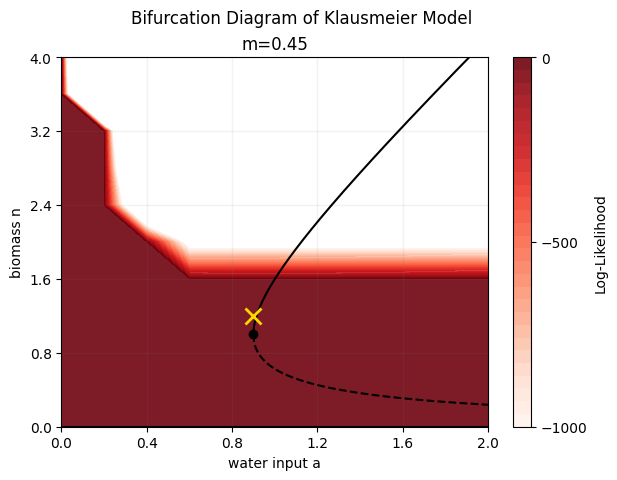

In [127]:
# prm: a = 0.9, n0 = 1.2
fig, ax = plt.subplots()
make_ll_plot(ax, csv, prm_ind)
bif_plot(m)
